In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras
import pandas as pd

In [2]:
train_data = pd.read_csv('./sf-crime/train.csv.zip')
test_data = pd.read_csv('./sf-crime/test.csv.zip')
#submission_format = pd.read_csv('./sf-crime/sampleSubmission.csv.zip')

In [3]:
train_data.info()
test_data.info()
#submission_format.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address 

# Submission analysis
Submission header -> test/train Category

Descript not needed..

In [4]:
#submission_format.head()

# Train data analysis

Columns: Dates, Category, Descript, DayOfWeek, PdDistrict, Resolution, Address, X, Y

In [5]:
train_data.head()
#train_data.info()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


# Test data analysis

Columns: Id, Dates, DayOfWeek, Category, PdDistrict, Address, X, Y

In [6]:
test_data.head()
#test_data.info()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [7]:
def updateDateColumns(data):
    if 'Dates' in data:
        dates = pd.to_datetime(data['Dates'])
        data['Dates'] = dates
        data['Year'] = dates.dt.year
        data['Month'] = dates.dt.month
        data['Day'] = dates.dt.day
        data['DayOfWeek'] = dates.dt.weekday
        data['Hour'] = dates.dt.hour
        data['Minute'] = dates.dt.minute
        data.drop(columns='Dates', inplace=True)

def dropColumn(data, column):
    if column in data:
        data.drop(columns=column, inplace=True)

def convertColumnToCategory(data, column):
    data[column] = data[column].astype('category')

def dropCoordinatesFor(data, column, min, max):
    if column in data:
        data.drop(data[(data[column] < min)].index, inplace=True)
        data.drop(data[(data[column] > max)].index, inplace=True)



In [8]:
train_data.info(verbose=False)
test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Columns: 9 entries, Dates to Y
dtypes: float64(2), object(7)
memory usage: 60.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Columns: 7 entries, Id to Y
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [9]:
dropColumn(train_data, 'Resolution') # useless?
dropColumn(train_data, 'Descript') # useless?
# dropColumn(train_data, 'Address') # useless?

train_data.info(verbose=False)
test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Columns: 7 entries, Dates to Y
dtypes: float64(2), object(5)
memory usage: 46.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Columns: 7 entries, Id to Y
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [10]:
convertColumnToCategory(train_data, ['Category', 'Address', 'PdDistrict'])
convertColumnToCategory(test_data, ['Address', 'PdDistrict'])

train_data.info(verbose=False)
test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Columns: 7 entries, Dates to Y
dtypes: category(3), float64(2), object(2)
memory usage: 30.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Columns: 7 entries, Id to Y
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 36.9+ MB


In [11]:
dropCoordinatesFor(train_data, 'Y', 35.0, 45.0)
dropCoordinatesFor(test_data, 'Y', 35.0, 45.0)

dropCoordinatesFor(train_data, 'X', -130.0, -115.0)
dropCoordinatesFor(test_data, 'X', -130.0, -115.0)

train_data.info(verbose=False)
test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877982 entries, 0 to 878048
Columns: 7 entries, Dates to Y
dtypes: category(3), float64(2), object(2)
memory usage: 37.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 884186 entries, 0 to 884261
Columns: 7 entries, Id to Y
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 43.7+ MB


In [12]:
updateDateColumns(train_data) # seperate values better than string blob
updateDateColumns(test_data) # seperate values better than string blob

train_data.info(verbose=False)
test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877982 entries, 0 to 878048
Columns: 11 entries, Category to Minute
dtypes: category(3), float64(2), int64(6)
memory usage: 64.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 884186 entries, 0 to 884261
Columns: 11 entries, Id to Minute
dtypes: category(2), float64(2), int64(7)
memory usage: 70.7 MB


In [14]:
train_data.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,Minute
0,WARRANTS,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
1,OTHER OFFENSES,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53
2,OTHER OFFENSES,2,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33
3,LARCENY/THEFT,2,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30
4,LARCENY/THEFT,2,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30


In [15]:
test_data.head()

,Id,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,Minute
0,0,6,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59
1,1,6,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51
2,2,6,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50
3,3,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45
4,4,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877982 entries, 0 to 878048
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Category    877982 non-null  category
 1   DayOfWeek   877982 non-null  int64   
 2   PdDistrict  877982 non-null  category
 3   Address     877982 non-null  category
 4   X           877982 non-null  float64 
 5   Y           877982 non-null  float64 
 6   Year        877982 non-null  int64   
 7   Month       877982 non-null  int64   
 8   Day         877982 non-null  int64   
 9   Hour        877982 non-null  int64   
 10  Minute      877982 non-null  int64   
dtypes: category(3), float64(2), int64(6)
memory usage: 64.3 MB


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884186 entries, 0 to 884261
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Id          884186 non-null  int64   
 1   DayOfWeek   884186 non-null  int64   
 2   PdDistrict  884186 non-null  category
 3   Address     884186 non-null  category
 4   X           884186 non-null  float64 
 5   Y           884186 non-null  float64 
 6   Year        884186 non-null  int64   
 7   Month       884186 non-null  int64   
 8   Day         884186 non-null  int64   
 9   Hour        884186 non-null  int64   
 10  Minute      884186 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 70.7 MB


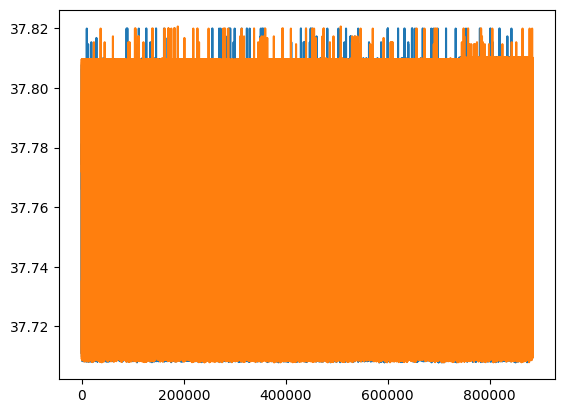

In [19]:
plt.plot(train_data['Y'])
plt.plot(test_data['Y'])

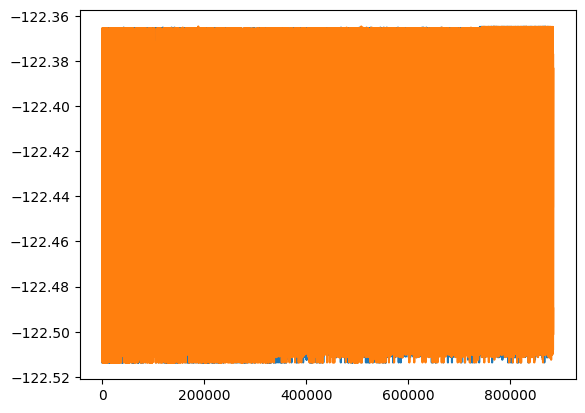

In [18]:
plt.plot(train_data['X'])
plt.plot(test_data['X'])

# Training

In [24]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout


In [23]:
X = train_data.drop(columns='Category')
Y = pd.get_dummies(train_data['Category'])

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(746284, 10) (746284, 39)
(131698, 10) (131698, 39)


In [32]:
model = Sequential()
model.add(Dense(32, input_shape = (X.shape[1],)))
model.add(Dense(16))
model.add(Activation('selu'))
model.add(Dense(32))
model.add(Activation('selu'))
model.add(Dense(16))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                352       
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 activation_12 (Activation)  (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 activation_13 (Activation)  (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 activation_14 (Activation)  (None, 16)               

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train=model.fit(X_train,y_train, 
         batch_size=32,
         epochs=16,
         verbose=2,
         validation_data=(X_test,y_test))